### Monterey Wharf 2 - Seasonal cycle

Start by importing libraries and reading data into a Pandas data frame.

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'data_files/Monterey_Wharf2_shorestation_hourly.csv'
df = pd.read_csv(filename,parse_dates=[0])

The `unix_time` variable is the number of seconds since Jan-1-1970. The `Date_Time` variable contains the same times in in the DateTime64 format used by Numpy and Pandas. This is useful for plotting.

In [2]:
unix_time = np.array(df['unix_time'])
Date_Time = np.array(df['Date_Time'])
Temp = np.array(df['Temp']) # Temperature

Make a preliminary plot of the time series.

<IPython.core.display.Javascript object>


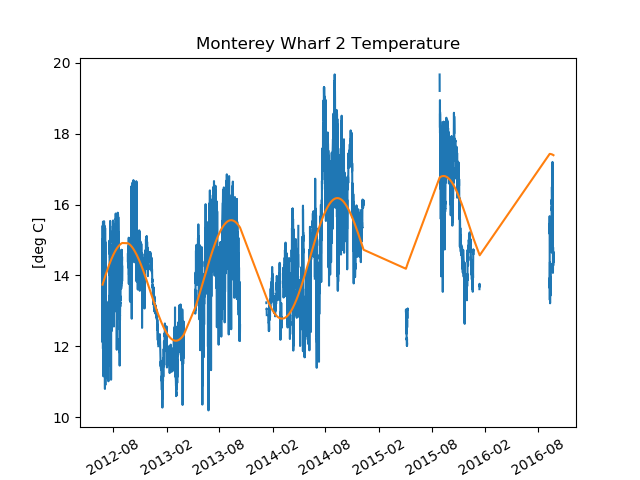

In [3]:
plt.figure()
plt.plot(Date_Time,Temp)
plt.ylabel('[deg C]')
plt.title('Monterey Wharf 2 Temperature')
plt.xticks(rotation=30);

Least squares coefficients: [ -1.32202659e+01   1.97568895e-08  -1.40300368e+00  -6.38246687e-01]
The temperature trend is 0.62348001582 degrees C per year.


<IPython.core.display.Javascript object>


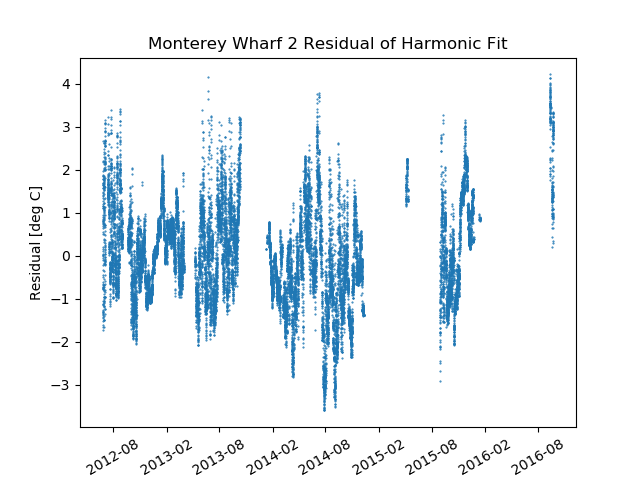

In [4]:
from harmonic import seasonal_fit
# Get indexes where there are good values.
good_values = np.isfinite(unix_time) & np.isfinite(Temp)

# Get just the good values for each input, so there's no special indexing below.
seconds = unix_time[good_values]
temperature = Temp[good_values]
dates = Date_Time[good_values]

sec_per_year = 3600*24*365.25
# Use the imported function to get curve fit coefficients.
coefficients = seasonal_fit(seconds, temperature, sec_per_year)
print('Least squares coefficients:', coefficients)
[c0, c1, c2, c3] = coefficients
print('The temperature trend is', c1*sec_per_year, 'degrees C per year.')

# Combine the constants to make the next line more compact (and 20% faster)
k = 2 * np.pi/sec_per_year
fit_temp = [c0 + c1*x + c2*np.sin(k*x) + c3*np.cos(k*x) for x in seconds]

# Add the fit to the plot above.
plt.plot(dates, fit_temp)

# Make  a new plot of the residual.
residual = fit_temp - temperature
plt.figure()
plt.plot(dates, residual, '.', ms=1)
plt.ylabel('Residual [deg C]')
plt.title('Monterey Wharf 2 Residual of Harmonic Fit')
plt.xticks(rotation=30);

The model captures the general seasonal cycle and the long-term trend fairly well. It seems unlikely that this approach could ever capture the high-frequency swings of 2 to 4 degrees, since they are probably determined by local weather and other non-cyclic factors.  Two possible improvements come to mind.  (1) Seasonal temperatures here tend to fall at a different rate than they rise.  A crude way to capture that could be a second pair of sin and cos functions offset by a few months to allow some asymmetry.  (2) Another improvement would relate to tidal cycles, which seem likely to affect temperatures measured at a particular time of day.  Given the complexity of tidal height and timing, actually doing this could be complicated.